In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
AAPL=pd.read_csv("APPLE.csv")
MSFT=pd.read_csv("MICROSOFT.csv")
GOOG=pd.read_csv("GOOGLE.csv")
AMZN=pd.read_csv("AMAZON.csv")
TSLA=pd.read_csv("TESLA.csv")

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Close/Last'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close/Last'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [5]:
model = Model()

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-trai

In [8]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

Text(0, 0.5, 'learning rate')

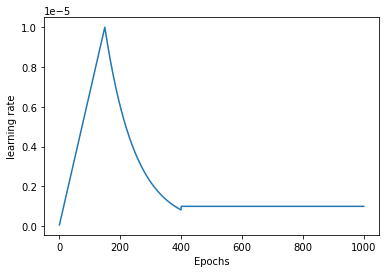

In [23]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)
plt.xlabel("Epochs")
plt.ylabel("learning rate")

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [11]:
AAPL.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/30/2022,177.77,92633150,178.55,179.61,176.70
1,03/29/2022,178.96,100589400,176.69,179.01,176.34
2,03/28/2022,175.60,90371920,172.17,175.73,172.00
3,03/25/2022,174.72,80546160,173.88,175.28,172.75
4,03/24/2022,174.07,90131420,171.06,174.14,170.21


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   int64  
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [13]:
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

In [15]:
AAPL_Model = Model()

In [16]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [17]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/1000
6/6 [==============================] - 5s 150ms/step - loss: 3425.9128 - root_mean_squared_error: 58.5313 - val_loss: 20462.2793 - val_root_mean_squared_error: 143.0464 - lr: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 25ms/step - loss: 3425.9043 - root_mean_squared_error: 58.5312 - val_loss: 20462.0781 - val_root_mean_squared_error: 143.0457 - lr: 6.6667e-08
Epoch 3/1000
6/6 [==============================] - 0s 24ms/step - loss: 3425.8718 - root_mean_squared_error: 58.5309 - val_loss: 20461.6816 - val_root_mean_squared_error: 143.0443 - lr: 1.3333e-07
Epoch 4/1000
6/6 [==============================] - 0s 23ms/step - loss: 3425.8203 - root_mean_squared_error: 58.5305 - val_loss: 20461.0605 - val_root_mean_squared_error: 143.0422 - lr: 2.0000e-07
Epoch 5/1000
6/6 [==============================] - 0s 23ms/step - loss: 3425.7405 - root_mean_squared_error: 58.5298 - val_loss: 20460.2559 - val_root_mean_squared_error: 143.0394 - lr: 2.6667e-07
Epoch 6/1

6/6 [==============================] - 0s 26ms/step - loss: 3403.2314 - root_mean_squared_error: 58.3372 - val_loss: 20296.2207 - val_root_mean_squared_error: 142.4648 - lr: 2.7333e-06
Epoch 43/1000
6/6 [==============================] - 0s 25ms/step - loss: 3402.0554 - root_mean_squared_error: 58.3271 - val_loss: 20286.7891 - val_root_mean_squared_error: 142.4317 - lr: 2.8000e-06
Epoch 44/1000
6/6 [==============================] - 0s 25ms/step - loss: 3400.8462 - root_mean_squared_error: 58.3168 - val_loss: 20277.5840 - val_root_mean_squared_error: 142.3994 - lr: 2.8667e-06
Epoch 45/1000
6/6 [==============================] - 0s 23ms/step - loss: 3399.6443 - root_mean_squared_error: 58.3065 - val_loss: 20268.2871 - val_root_mean_squared_error: 142.3667 - lr: 2.9333e-06
Epoch 46/1000
6/6 [==============================] - 0s 22ms/step - loss: 3398.4238 - root_mean_squared_error: 58.2960 - val_loss: 20259.1113 - val_root_mean_squared_error: 142.3345 - lr: 3.0000e-06
Epoch 47/1000
6/6 [

6/6 [==============================] - 0s 24ms/step - loss: 3228.2214 - root_mean_squared_error: 56.8174 - val_loss: 18997.5801 - val_root_mean_squared_error: 137.8317 - lr: 5.4667e-06
Epoch 84/1000
6/6 [==============================] - 0s 24ms/step - loss: 3217.3567 - root_mean_squared_error: 56.7217 - val_loss: 18923.3379 - val_root_mean_squared_error: 137.5621 - lr: 5.5333e-06
Epoch 85/1000
6/6 [==============================] - 0s 23ms/step - loss: 3206.2246 - root_mean_squared_error: 56.6235 - val_loss: 18841.3066 - val_root_mean_squared_error: 137.2636 - lr: 5.6000e-06
Epoch 86/1000
6/6 [==============================] - 0s 24ms/step - loss: 3193.6943 - root_mean_squared_error: 56.5128 - val_loss: 18754.4785 - val_root_mean_squared_error: 136.9470 - lr: 5.6667e-06
Epoch 87/1000
6/6 [==============================] - 0s 24ms/step - loss: 3180.2917 - root_mean_squared_error: 56.3941 - val_loss: 18658.9277 - val_root_mean_squared_error: 136.5977 - lr: 5.7333e-06
Epoch 88/1000
6/6 [

6/6 [==============================] - 0s 24ms/step - loss: 978.2140 - root_mean_squared_error: 31.2764 - val_loss: 5549.6631 - val_root_mean_squared_error: 74.4961 - lr: 8.2000e-06
Epoch 125/1000
6/6 [==============================] - 0s 25ms/step - loss: 946.7095 - root_mean_squared_error: 30.7686 - val_loss: 5381.2817 - val_root_mean_squared_error: 73.3572 - lr: 8.2667e-06
Epoch 126/1000
6/6 [==============================] - 0s 25ms/step - loss: 915.9886 - root_mean_squared_error: 30.2653 - val_loss: 5218.9214 - val_root_mean_squared_error: 72.2421 - lr: 8.3333e-06
Epoch 127/1000
6/6 [==============================] - 0s 23ms/step - loss: 888.3237 - root_mean_squared_error: 29.8048 - val_loss: 5070.6821 - val_root_mean_squared_error: 71.2087 - lr: 8.4000e-06
Epoch 128/1000
6/6 [==============================] - 0s 24ms/step - loss: 860.5388 - root_mean_squared_error: 29.3349 - val_loss: 4933.6855 - val_root_mean_squared_error: 70.2402 - lr: 8.4667e-06
Epoch 129/1000
6/6 [==========

6/6 [==============================] - 0s 24ms/step - loss: 12.2496 - root_mean_squared_error: 3.4999 - val_loss: 88.5654 - val_root_mean_squared_error: 9.4109 - lr: 8.6071e-06
Epoch 167/1000
6/6 [==============================] - 0s 22ms/step - loss: 12.1879 - root_mean_squared_error: 3.4911 - val_loss: 89.0398 - val_root_mean_squared_error: 9.4361 - lr: 8.5214e-06
Epoch 168/1000
6/6 [==============================] - 0s 23ms/step - loss: 12.1515 - root_mean_squared_error: 3.4859 - val_loss: 86.0083 - val_root_mean_squared_error: 9.2741 - lr: 8.4366e-06
Epoch 169/1000
6/6 [==============================] - 0s 26ms/step - loss: 12.1043 - root_mean_squared_error: 3.4791 - val_loss: 85.7240 - val_root_mean_squared_error: 9.2587 - lr: 8.3527e-06
Epoch 170/1000
6/6 [==============================] - 0s 27ms/step - loss: 12.0770 - root_mean_squared_error: 3.4752 - val_loss: 84.9670 - val_root_mean_squared_error: 9.2178 - lr: 8.2696e-06
Epoch 171/1000
6/6 [==============================] - 0

Epoch 209/1000
6/6 [==============================] - 0s 28ms/step - loss: 11.3613 - root_mean_squared_error: 3.3707 - val_loss: 73.2698 - val_root_mean_squared_error: 8.5598 - lr: 5.5990e-06
Epoch 210/1000
6/6 [==============================] - 0s 25ms/step - loss: 11.3192 - root_mean_squared_error: 3.3644 - val_loss: 74.8869 - val_root_mean_squared_error: 8.6537 - lr: 5.5433e-06
Epoch 211/1000
6/6 [==============================] - 0s 23ms/step - loss: 11.3270 - root_mean_squared_error: 3.3656 - val_loss: 76.7411 - val_root_mean_squared_error: 8.7602 - lr: 5.4881e-06
Epoch 212/1000
6/6 [==============================] - 0s 24ms/step - loss: 11.3445 - root_mean_squared_error: 3.3682 - val_loss: 77.3938 - val_root_mean_squared_error: 8.7974 - lr: 5.4335e-06
Epoch 213/1000
6/6 [==============================] - 0s 26ms/step - loss: 11.3386 - root_mean_squared_error: 3.3673 - val_loss: 73.1606 - val_root_mean_squared_error: 8.5534 - lr: 5.3794e-06
Epoch 214/1000
6/6 [====================

Epoch 252/1000
6/6 [==============================] - 0s 25ms/step - loss: 11.0067 - root_mean_squared_error: 3.3176 - val_loss: 68.5510 - val_root_mean_squared_error: 8.2796 - lr: 3.6422e-06
Epoch 253/1000
6/6 [==============================] - 0s 23ms/step - loss: 11.0143 - root_mean_squared_error: 3.3188 - val_loss: 67.8389 - val_root_mean_squared_error: 8.2364 - lr: 3.6059e-06
Epoch 254/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.9933 - root_mean_squared_error: 3.3156 - val_loss: 68.0078 - val_root_mean_squared_error: 8.2467 - lr: 3.5701e-06
Epoch 255/1000
6/6 [==============================] - 0s 24ms/step - loss: 11.0023 - root_mean_squared_error: 3.3170 - val_loss: 69.2395 - val_root_mean_squared_error: 8.3210 - lr: 3.5345e-06
Epoch 256/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.9857 - root_mean_squared_error: 3.3145 - val_loss: 68.7949 - val_root_mean_squared_error: 8.2943 - lr: 3.4994e-06
Epoch 257/1000
6/6 [====================

Epoch 295/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.8250 - root_mean_squared_error: 3.2901 - val_loss: 63.3756 - val_root_mean_squared_error: 7.9609 - lr: 2.3693e-06
Epoch 296/1000
6/6 [==============================] - 0s 33ms/step - loss: 10.8113 - root_mean_squared_error: 3.2881 - val_loss: 63.0188 - val_root_mean_squared_error: 7.9384 - lr: 2.3457e-06
Epoch 297/1000
6/6 [==============================] - 0s 31ms/step - loss: 10.8099 - root_mean_squared_error: 3.2878 - val_loss: 62.4470 - val_root_mean_squared_error: 7.9023 - lr: 2.3224e-06
Epoch 298/1000
6/6 [==============================] - 0s 31ms/step - loss: 10.8077 - root_mean_squared_error: 3.2875 - val_loss: 62.5248 - val_root_mean_squared_error: 7.9073 - lr: 2.2993e-06
Epoch 299/1000
6/6 [==============================] - 0s 35ms/step - loss: 10.8034 - root_mean_squared_error: 3.2868 - val_loss: 62.2897 - val_root_mean_squared_error: 7.8924 - lr: 2.2764e-06
Epoch 300/1000
6/6 [====================

Epoch 338/1000
6/6 [==============================] - 0s 30ms/step - loss: 10.6849 - root_mean_squared_error: 3.2688 - val_loss: 59.0959 - val_root_mean_squared_error: 7.6874 - lr: 1.5412e-06
Epoch 339/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.6822 - root_mean_squared_error: 3.2684 - val_loss: 59.5734 - val_root_mean_squared_error: 7.7184 - lr: 1.5259e-06
Epoch 340/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.6767 - root_mean_squared_error: 3.2675 - val_loss: 59.6089 - val_root_mean_squared_error: 7.7207 - lr: 1.5107e-06
Epoch 341/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.6735 - root_mean_squared_error: 3.2670 - val_loss: 59.7023 - val_root_mean_squared_error: 7.7267 - lr: 1.4957e-06
Epoch 342/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.6708 - root_mean_squared_error: 3.2666 - val_loss: 59.8226 - val_root_mean_squared_error: 7.7345 - lr: 1.4808e-06
Epoch 343/1000
6/6 [====================

Epoch 381/1000
6/6 [==============================] - 0s 26ms/step - loss: 10.5972 - root_mean_squared_error: 3.2553 - val_loss: 59.5320 - val_root_mean_squared_error: 7.7157 - lr: 1.0026e-06
Epoch 382/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.5992 - root_mean_squared_error: 3.2556 - val_loss: 59.6661 - val_root_mean_squared_error: 7.7244 - lr: 9.9261e-07
Epoch 383/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.5945 - root_mean_squared_error: 3.2549 - val_loss: 59.6765 - val_root_mean_squared_error: 7.7251 - lr: 9.8274e-07
Epoch 384/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.5924 - root_mean_squared_error: 3.2546 - val_loss: 59.2934 - val_root_mean_squared_error: 7.7002 - lr: 9.7296e-07
Epoch 385/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.5920 - root_mean_squared_error: 3.2545 - val_loss: 59.0907 - val_root_mean_squared_error: 7.6870 - lr: 9.6328e-07
Epoch 386/1000
6/6 [====================

Epoch 424/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.5361 - root_mean_squared_error: 3.2459 - val_loss: 58.8265 - val_root_mean_squared_error: 7.6698 - lr: 1.0000e-06
Epoch 425/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.5384 - root_mean_squared_error: 3.2463 - val_loss: 59.0839 - val_root_mean_squared_error: 7.6866 - lr: 1.0000e-06
Epoch 426/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.5329 - root_mean_squared_error: 3.2454 - val_loss: 59.1590 - val_root_mean_squared_error: 7.6915 - lr: 1.0000e-06
Epoch 427/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.5300 - root_mean_squared_error: 3.2450 - val_loss: 59.1641 - val_root_mean_squared_error: 7.6918 - lr: 1.0000e-06
Epoch 428/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.5287 - root_mean_squared_error: 3.2448 - val_loss: 58.9178 - val_root_mean_squared_error: 7.6758 - lr: 1.0000e-06
Epoch 429/1000
6/6 [====================

Epoch 467/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.4692 - root_mean_squared_error: 3.2356 - val_loss: 56.7564 - val_root_mean_squared_error: 7.5337 - lr: 1.0000e-06
Epoch 468/1000
6/6 [==============================] - 0s 26ms/step - loss: 10.4608 - root_mean_squared_error: 3.2343 - val_loss: 57.0164 - val_root_mean_squared_error: 7.5509 - lr: 1.0000e-06
Epoch 469/1000
6/6 [==============================] - 0s 26ms/step - loss: 10.4610 - root_mean_squared_error: 3.2343 - val_loss: 57.1442 - val_root_mean_squared_error: 7.5594 - lr: 1.0000e-06
Epoch 470/1000
6/6 [==============================] - 0s 27ms/step - loss: 10.4585 - root_mean_squared_error: 3.2340 - val_loss: 57.2523 - val_root_mean_squared_error: 7.5665 - lr: 1.0000e-06
Epoch 471/1000
6/6 [==============================] - 0s 25ms/step - loss: 10.4621 - root_mean_squared_error: 3.2345 - val_loss: 57.1465 - val_root_mean_squared_error: 7.5595 - lr: 1.0000e-06
Epoch 472/1000
6/6 [====================

Epoch 510/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.3936 - root_mean_squared_error: 3.2239 - val_loss: 54.8951 - val_root_mean_squared_error: 7.4091 - lr: 1.0000e-06
Epoch 511/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3917 - root_mean_squared_error: 3.2236 - val_loss: 54.9305 - val_root_mean_squared_error: 7.4115 - lr: 1.0000e-06
Epoch 512/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.3927 - root_mean_squared_error: 3.2238 - val_loss: 54.9022 - val_root_mean_squared_error: 7.4096 - lr: 1.0000e-06
Epoch 513/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.3913 - root_mean_squared_error: 3.2235 - val_loss: 55.3189 - val_root_mean_squared_error: 7.4377 - lr: 1.0000e-06
Epoch 514/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3836 - root_mean_squared_error: 3.2224 - val_loss: 55.3978 - val_root_mean_squared_error: 7.4430 - lr: 1.0000e-06
Epoch 515/1000
6/6 [====================

Epoch 553/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3225 - root_mean_squared_error: 3.2129 - val_loss: 54.7745 - val_root_mean_squared_error: 7.4010 - lr: 1.0000e-06
Epoch 554/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3179 - root_mean_squared_error: 3.2122 - val_loss: 55.1117 - val_root_mean_squared_error: 7.4237 - lr: 1.0000e-06
Epoch 555/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3155 - root_mean_squared_error: 3.2118 - val_loss: 55.3139 - val_root_mean_squared_error: 7.4373 - lr: 1.0000e-06
Epoch 556/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.3167 - root_mean_squared_error: 3.2120 - val_loss: 55.2402 - val_root_mean_squared_error: 7.4324 - lr: 1.0000e-06
Epoch 557/1000
6/6 [==============================] - 0s 20ms/step - loss: 10.3134 - root_mean_squared_error: 3.2115 - val_loss: 55.2263 - val_root_mean_squared_error: 7.4314 - lr: 1.0000e-06
Epoch 558/1000
6/6 [====================

Epoch 596/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.2464 - root_mean_squared_error: 3.2010 - val_loss: 54.1123 - val_root_mean_squared_error: 7.3561 - lr: 1.0000e-06
Epoch 597/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.2459 - root_mean_squared_error: 3.2009 - val_loss: 54.3937 - val_root_mean_squared_error: 7.3752 - lr: 1.0000e-06
Epoch 598/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.2437 - root_mean_squared_error: 3.2006 - val_loss: 54.2135 - val_root_mean_squared_error: 7.3630 - lr: 1.0000e-06
Epoch 599/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.2447 - root_mean_squared_error: 3.2007 - val_loss: 54.3516 - val_root_mean_squared_error: 7.3724 - lr: 1.0000e-06
Epoch 600/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.2416 - root_mean_squared_error: 3.2002 - val_loss: 54.3597 - val_root_mean_squared_error: 7.3729 - lr: 1.0000e-06
Epoch 601/1000
6/6 [====================

Epoch 639/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.1798 - root_mean_squared_error: 3.1906 - val_loss: 52.2392 - val_root_mean_squared_error: 7.2277 - lr: 1.0000e-06
Epoch 640/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.1798 - root_mean_squared_error: 3.1906 - val_loss: 52.3246 - val_root_mean_squared_error: 7.2336 - lr: 1.0000e-06
Epoch 641/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.1744 - root_mean_squared_error: 3.1897 - val_loss: 52.4048 - val_root_mean_squared_error: 7.2391 - lr: 1.0000e-06
Epoch 642/1000
6/6 [==============================] - 0s 24ms/step - loss: 10.1906 - root_mean_squared_error: 3.1923 - val_loss: 53.1826 - val_root_mean_squared_error: 7.2926 - lr: 1.0000e-06
Epoch 643/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.1723 - root_mean_squared_error: 3.1894 - val_loss: 52.9417 - val_root_mean_squared_error: 7.2761 - lr: 1.0000e-06
Epoch 644/1000
6/6 [====================

Epoch 682/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.1089 - root_mean_squared_error: 3.1795 - val_loss: 51.6763 - val_root_mean_squared_error: 7.1886 - lr: 1.0000e-06
Epoch 683/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.1034 - root_mean_squared_error: 3.1786 - val_loss: 51.3372 - val_root_mean_squared_error: 7.1650 - lr: 1.0000e-06
Epoch 684/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.1096 - root_mean_squared_error: 3.1796 - val_loss: 50.9570 - val_root_mean_squared_error: 7.1384 - lr: 1.0000e-06
Epoch 685/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.1099 - root_mean_squared_error: 3.1796 - val_loss: 50.7659 - val_root_mean_squared_error: 7.1250 - lr: 1.0000e-06
Epoch 686/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.1111 - root_mean_squared_error: 3.1798 - val_loss: 51.0767 - val_root_mean_squared_error: 7.1468 - lr: 1.0000e-06
Epoch 687/1000
6/6 [====================

Epoch 725/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.0565 - root_mean_squared_error: 3.1712 - val_loss: 52.2430 - val_root_mean_squared_error: 7.2279 - lr: 1.0000e-06
Epoch 726/1000
6/6 [==============================] - 0s 21ms/step - loss: 10.0460 - root_mean_squared_error: 3.1695 - val_loss: 52.3783 - val_root_mean_squared_error: 7.2373 - lr: 1.0000e-06
Epoch 727/1000
6/6 [==============================] - 0s 23ms/step - loss: 10.0404 - root_mean_squared_error: 3.1687 - val_loss: 52.0053 - val_root_mean_squared_error: 7.2115 - lr: 1.0000e-06
Epoch 728/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.0398 - root_mean_squared_error: 3.1686 - val_loss: 51.6106 - val_root_mean_squared_error: 7.1841 - lr: 1.0000e-06
Epoch 729/1000
6/6 [==============================] - 0s 22ms/step - loss: 10.0363 - root_mean_squared_error: 3.1680 - val_loss: 51.5830 - val_root_mean_squared_error: 7.1821 - lr: 1.0000e-06
Epoch 730/1000
6/6 [====================

Epoch 768/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.9857 - root_mean_squared_error: 3.1600 - val_loss: 50.4205 - val_root_mean_squared_error: 7.1007 - lr: 1.0000e-06
Epoch 769/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9744 - root_mean_squared_error: 3.1582 - val_loss: 50.7974 - val_root_mean_squared_error: 7.1272 - lr: 1.0000e-06
Epoch 770/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9736 - root_mean_squared_error: 3.1581 - val_loss: 51.0102 - val_root_mean_squared_error: 7.1421 - lr: 1.0000e-06
Epoch 771/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9724 - root_mean_squared_error: 3.1579 - val_loss: 50.9496 - val_root_mean_squared_error: 7.1379 - lr: 1.0000e-06
Epoch 772/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.9711 - root_mean_squared_error: 3.1577 - val_loss: 51.5301 - val_root_mean_squared_error: 7.1784 - lr: 1.0000e-06
Epoch 773/1000
6/6 [=========================

Epoch 811/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.9144 - root_mean_squared_error: 3.1487 - val_loss: 48.7420 - val_root_mean_squared_error: 6.9815 - lr: 1.0000e-06
Epoch 812/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9110 - root_mean_squared_error: 3.1482 - val_loss: 49.1653 - val_root_mean_squared_error: 7.0118 - lr: 1.0000e-06
Epoch 813/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9058 - root_mean_squared_error: 3.1473 - val_loss: 49.3692 - val_root_mean_squared_error: 7.0263 - lr: 1.0000e-06
Epoch 814/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.9025 - root_mean_squared_error: 3.1468 - val_loss: 49.6162 - val_root_mean_squared_error: 7.0439 - lr: 1.0000e-06
Epoch 815/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.9044 - root_mean_squared_error: 3.1471 - val_loss: 49.9265 - val_root_mean_squared_error: 7.0659 - lr: 1.0000e-06
Epoch 816/1000
6/6 [=========================

Epoch 854/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.8444 - root_mean_squared_error: 3.1376 - val_loss: 48.4341 - val_root_mean_squared_error: 6.9595 - lr: 1.0000e-06
Epoch 855/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.8437 - root_mean_squared_error: 3.1375 - val_loss: 48.4333 - val_root_mean_squared_error: 6.9594 - lr: 1.0000e-06
Epoch 856/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.8374 - root_mean_squared_error: 3.1365 - val_loss: 48.2929 - val_root_mean_squared_error: 6.9493 - lr: 1.0000e-06
Epoch 857/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.8414 - root_mean_squared_error: 3.1371 - val_loss: 47.9283 - val_root_mean_squared_error: 6.9230 - lr: 1.0000e-06
Epoch 858/1000
6/6 [==============================] - 0s 36ms/step - loss: 9.8357 - root_mean_squared_error: 3.1362 - val_loss: 47.9768 - val_root_mean_squared_error: 6.9265 - lr: 1.0000e-06
Epoch 859/1000
6/6 [=========================

Epoch 897/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.7704 - root_mean_squared_error: 3.1258 - val_loss: 48.1021 - val_root_mean_squared_error: 6.9356 - lr: 1.0000e-06
Epoch 898/1000
6/6 [==============================] - 0s 30ms/step - loss: 9.7853 - root_mean_squared_error: 3.1282 - val_loss: 47.8470 - val_root_mean_squared_error: 6.9172 - lr: 1.0000e-06
Epoch 899/1000
6/6 [==============================] - 0s 30ms/step - loss: 9.7670 - root_mean_squared_error: 3.1252 - val_loss: 48.3931 - val_root_mean_squared_error: 6.9565 - lr: 1.0000e-06
Epoch 900/1000
6/6 [==============================] - 0s 29ms/step - loss: 9.7616 - root_mean_squared_error: 3.1244 - val_loss: 48.8701 - val_root_mean_squared_error: 6.9907 - lr: 1.0000e-06
Epoch 901/1000
6/6 [==============================] - 0s 30ms/step - loss: 9.7656 - root_mean_squared_error: 3.1250 - val_loss: 49.3299 - val_root_mean_squared_error: 7.0235 - lr: 1.0000e-06
Epoch 902/1000
6/6 [=========================

Epoch 940/1000
6/6 [==============================] - 0s 31ms/step - loss: 9.7010 - root_mean_squared_error: 3.1146 - val_loss: 47.8816 - val_root_mean_squared_error: 6.9197 - lr: 1.0000e-06
Epoch 941/1000
6/6 [==============================] - 0s 30ms/step - loss: 9.7202 - root_mean_squared_error: 3.1177 - val_loss: 48.4426 - val_root_mean_squared_error: 6.9601 - lr: 1.0000e-06
Epoch 942/1000
6/6 [==============================] - 0s 31ms/step - loss: 9.6964 - root_mean_squared_error: 3.1139 - val_loss: 48.2419 - val_root_mean_squared_error: 6.9456 - lr: 1.0000e-06
Epoch 943/1000
6/6 [==============================] - 0s 31ms/step - loss: 9.6955 - root_mean_squared_error: 3.1138 - val_loss: 48.1294 - val_root_mean_squared_error: 6.9375 - lr: 1.0000e-06
Epoch 944/1000
6/6 [==============================] - 0s 26ms/step - loss: 9.6932 - root_mean_squared_error: 3.1134 - val_loss: 47.5570 - val_root_mean_squared_error: 6.8962 - lr: 1.0000e-06
Epoch 945/1000
6/6 [=========================

Epoch 983/1000
6/6 [==============================] - 0s 31ms/step - loss: 9.6233 - root_mean_squared_error: 3.1022 - val_loss: 47.6804 - val_root_mean_squared_error: 6.9051 - lr: 1.0000e-06
Epoch 984/1000
6/6 [==============================] - 0s 31ms/step - loss: 9.6167 - root_mean_squared_error: 3.1011 - val_loss: 47.6084 - val_root_mean_squared_error: 6.8999 - lr: 1.0000e-06
Epoch 985/1000
6/6 [==============================] - 0s 25ms/step - loss: 9.6278 - root_mean_squared_error: 3.1029 - val_loss: 46.9456 - val_root_mean_squared_error: 6.8517 - lr: 1.0000e-06
Epoch 986/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.6152 - root_mean_squared_error: 3.1008 - val_loss: 46.7674 - val_root_mean_squared_error: 6.8387 - lr: 1.0000e-06
Epoch 987/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.6102 - root_mean_squared_error: 3.1000 - val_loss: 46.9395 - val_root_mean_squared_error: 6.8512 - lr: 1.0000e-06
Epoch 988/1000
6/6 [=========================

In [18]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

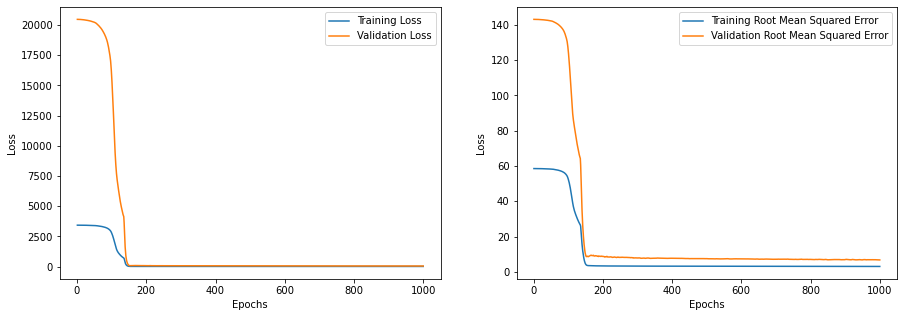

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [20]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

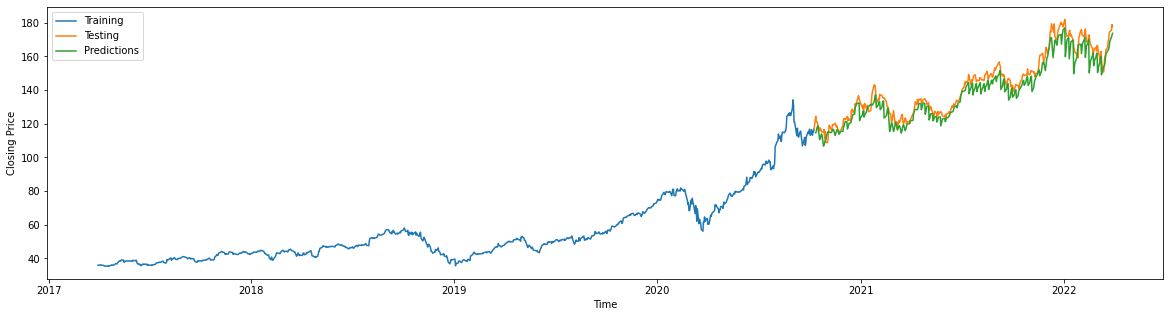

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Close/Last'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Close/Last'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [22]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.789173528612089
MAPE: 0.03634961809295691
